In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the dataset from csv file
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
#displaying the top 5 rows of data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check how many null values are present in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

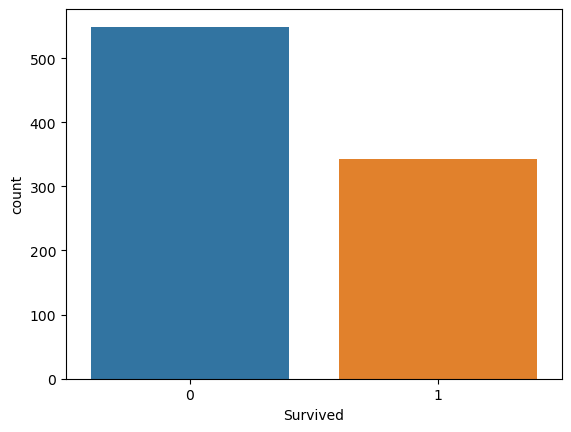

In [7]:
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Pclass', ylabel='count'>

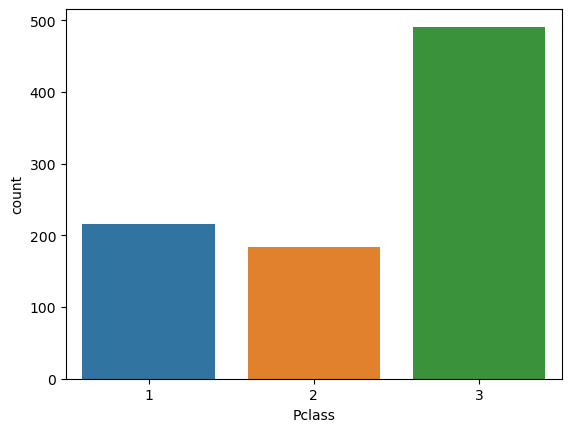

In [8]:
sns.countplot(x = 'Pclass', data = train)

<Axes: xlabel='Sex', ylabel='count'>

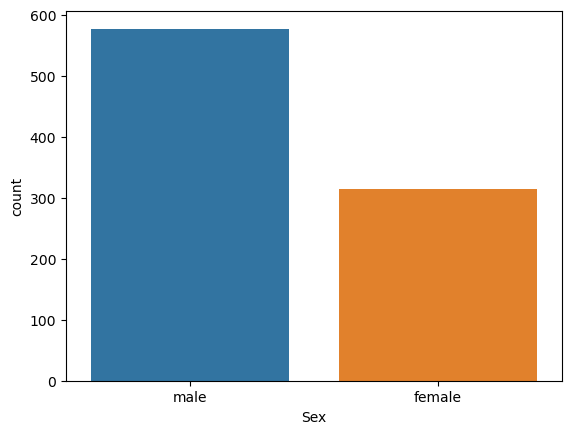

In [9]:
sns.countplot(x = 'Sex', data = train)

<Axes: xlabel='SibSp', ylabel='count'>

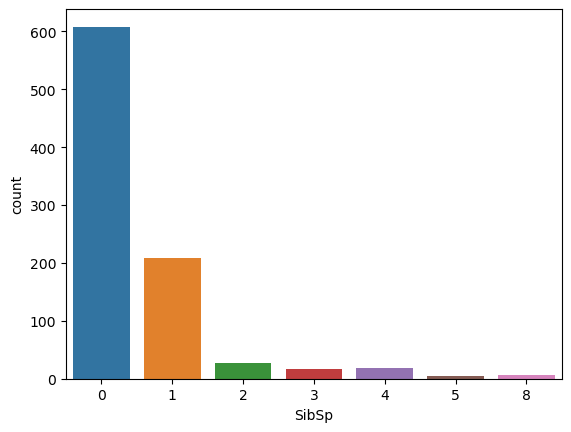

In [10]:
sns.countplot(x = 'SibSp', data = train)
#This shows that majority of the passengers were travelling alone.

<Axes: xlabel='Parch', ylabel='count'>

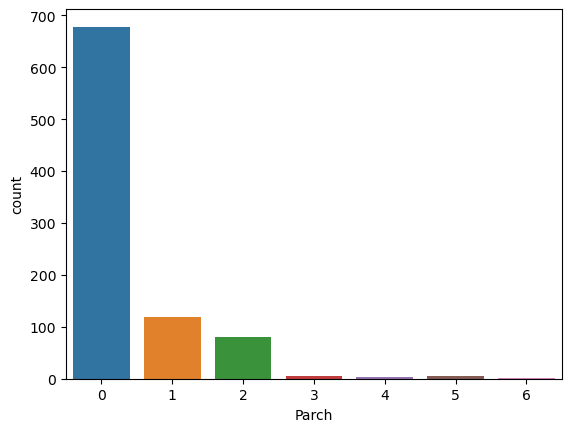

In [11]:
sns.countplot(x = 'Parch', data = train)

<Axes: xlabel='Embarked', ylabel='count'>

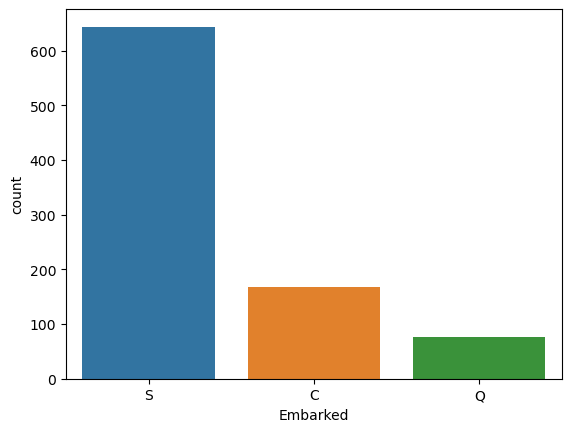

In [12]:
sns.countplot(x = 'Embarked', data = train)
#this helps us assume that City S may be the starting station of the journey
#as most of the passengers have boarded from this city.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12028\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

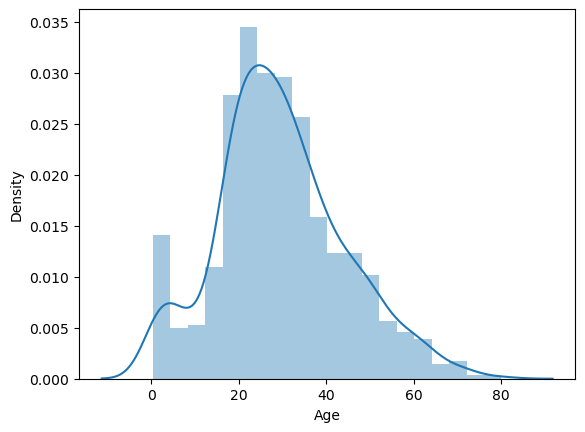

In [13]:
sns.distplot(train['Age'])

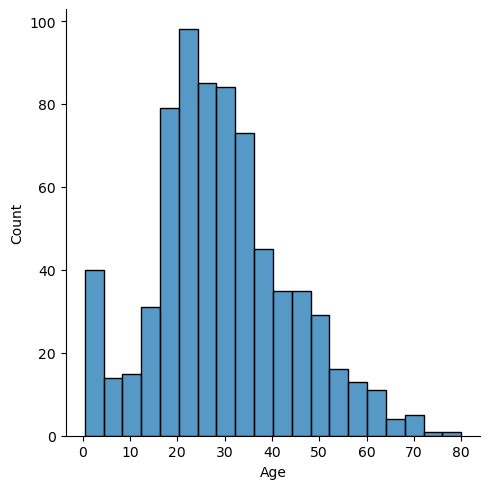

In [14]:
sns.displot(train['Age'])
#we can also use:
#sns.histplot(train['Age'])
#or 
#train['Age'].plot.hist()

#it gives us a distribution plot

<Axes: ylabel='Frequency'>

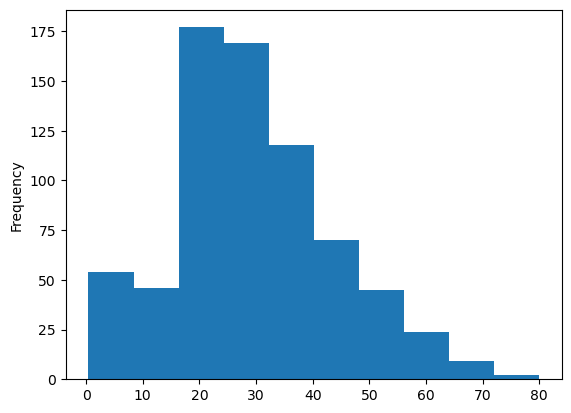

In [15]:
train['Age'].plot.hist()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12028\891094164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

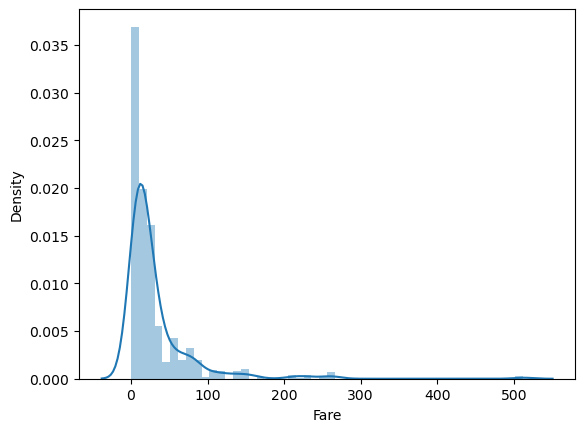

In [16]:
sns.distplot(train['Fare'])

we need to do preprocessing on the fare plot.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

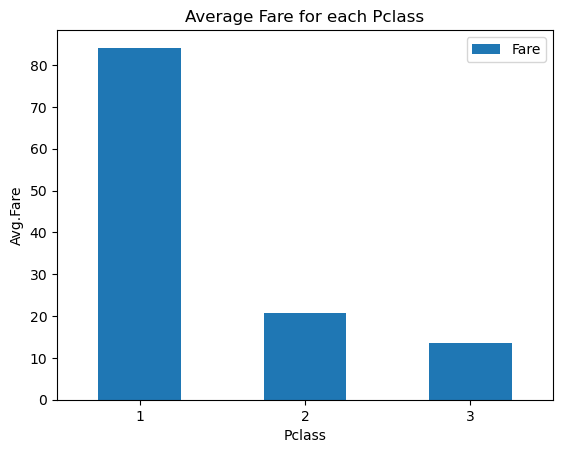

In [17]:
train.pivot_table(index='Pclass', values = 'Fare').plot(kind='bar')
#it will calculate mean for each passenger class and plot it in form of bargraph

plt.title('Average Fare for each Pclass')
plt.xlabel('Pclass')    #changing label of x-axis
plt.ylabel('Avg.Fare')  #changing label of x-axis
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

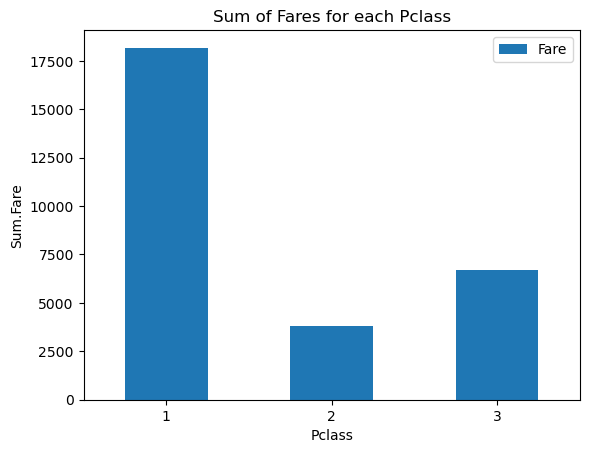

In [18]:
#when aggfunction is not provided, by default pivot_table() function will take mean of the values

train.pivot_table(index='Pclass', values = 'Fare', aggfunc=np.sum).plot(kind='bar')
#it will calculate sum of fare for each passenger class and plot it in form of bargraph

plt.title('Sum of Fares for each Pclass')
plt.xlabel('Pclass')    #changing label of x-axis
plt.ylabel('Sum.Fare')  #changing label of x-axis
plt.xticks(rotation=0)

## Data Preprocessing

In [74]:
titanic_len = len(train)
titanic = pd.concat([train,test],axis = 0)
titanic = titanic.reset_index(drop=True)   #to drop the index

In [75]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- We can find the null value in Age, Fare, Embarked by mean or mode but Cabin has
majority of null values and also it's of no use so we can drop the Cabin column

In [77]:
#dopping the Cabin column as it is of no use.
titanic = titanic.drop(columns = 'Cabin',axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [78]:
#filling missing values using mean of that column as they are numerical columns.
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [79]:
#filling missing values using mode of that column as it is categoriacal column.
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [80]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Log transformation for uniform distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12028\3001370571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

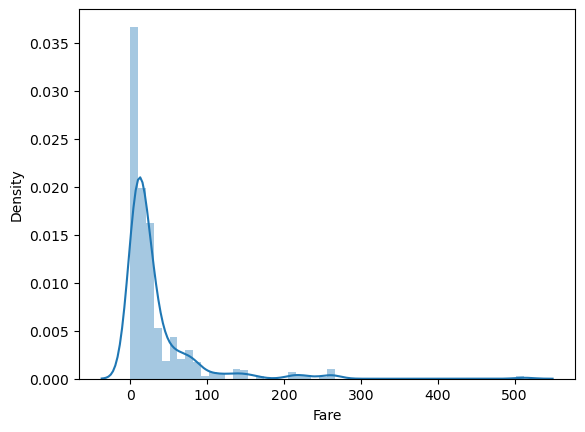

In [81]:
sns.distplot(titanic['Fare'])

In [82]:
titanic['Fare'] = np.log(titanic['Fare']+1)
#we have added +1 because in case the fare is zero or has null value it will throw error so to avoid it.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12028\3001370571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

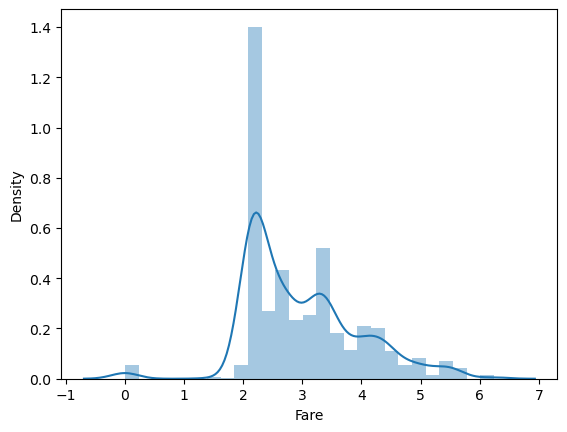

In [83]:
sns.distplot(titanic['Fare'])

## Corelation Matrix

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12028\2206779111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot = True, cmap = "coolwarm")


<Axes: >

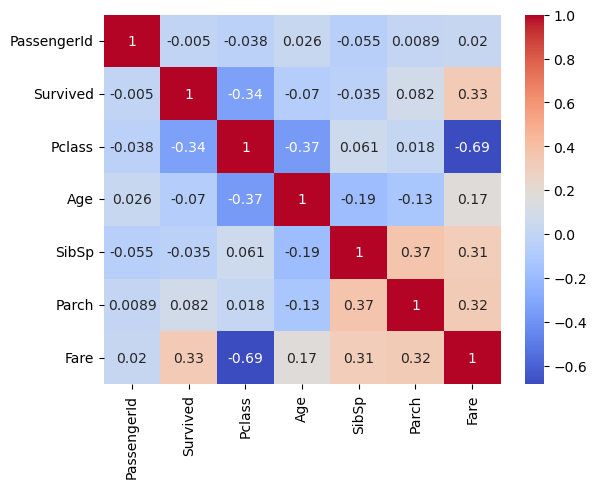

In [84]:
sns.heatmap(titanic.corr(), annot = True, cmap = "coolwarm")


Text(0.5, 1.0, 'Fare over Pclass graph who survived')

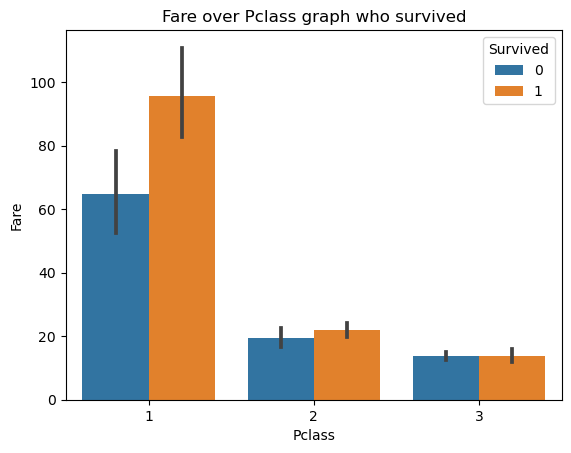

In [85]:
sns.barplot(data=train, x='Pclass',y='Fare', hue='Survived')
plt.title('Fare over Pclass graph who survived')

Text(0.5, 1.0, 'Fare of people who survived by different Pclass')

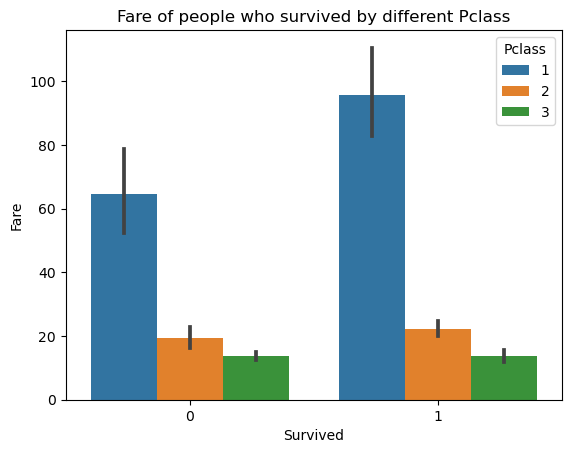

In [86]:
sns.barplot(data=train, x='Survived',y='Fare', hue='Pclass')
plt.title('Fare of people who survived by different Pclass')

## Dropping unnecessary data

In [87]:
titanic = titanic.drop(columns = ['Name','Ticket'], axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,2.110213,S
1,2,1.0,1,female,38.000000,1,0,4.280593,C
2,3,1.0,3,female,26.000000,0,0,2.188856,S
3,4,1.0,1,female,35.000000,1,0,3.990834,S
4,5,0.0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,2.202765,S
1305,1306,NaN,1,female,39.000000,0,0,4.699571,C
1306,1307,NaN,3,male,38.500000,0,0,2.110213,S
1307,1308,NaN,3,male,29.881138,0,0,2.202765,S


## Label Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    titanic[col] = le.fit_transform(titanic[col])

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


## Train-Test Split
Splititng the datasets for training and validation

In [96]:
train_len = len(train)
test_len = len(test)


# syntax :- iloc[starting row : ending row, starting column : ending column]

train = titanic.iloc[:train_len, :]
test = titanic.iloc[train_len:, :]
titanic.iloc

In [97]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0


In [98]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [125]:
#input split

x = train.drop(columns=['PassengerId','Survived'],axis = 1)
y = train['Survived']

#check the input attributes we gonna use for testing
x.head()
#y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## Model Training

In [126]:
#import the model
from sklearn.model_selection import train_test_split, cross_val_score

In [135]:
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state= 4)
    model.fit(x_train, y_train)
    print('Accuracy: ',model.score(x_test, y_test))
    
    score = cross_val_score(model,x,y)
    print(score)
    print('Cross Validation Score: ', np.mean(score))

In [137]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy:  0.8161434977578476
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
Cross Validation Score:  0.7833971502102819


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy:  0.8251121076233184
[0.75418994 0.75280899 0.79775281 0.74157303 0.82022472]
Cross Validation Score:  0.7733098989391751


In [139]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy:  0.7982062780269058
[0.77094972 0.79775281 0.85393258 0.76966292 0.83146067]
Cross Validation Score:  0.8047517418868871


## Complete Model Training with full data

In [144]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [145]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [146]:
x_test = test.drop(columns=['PassengerId','Survived'],axis = 1)

In [147]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.500000,0,0,2.178064,1
892,3,0,47.000000,1,0,2.079442,2
893,2,1,62.000000,0,0,2.369075,1
894,3,1,27.000000,0,0,2.268252,2
895,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,2.202765,2
1305,1,0,39.000000,0,0,4.699571,0
1306,3,1,38.500000,0,0,2.110213,2
1307,3,1,29.881138,0,0,2.202765,2


In [150]:
#show prediction results

pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

## Test Submission

In [160]:
#importing the submission template file
sub = pd.read_csv('datasets/gender_submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [162]:
#Replacing the Survived column of submission template with the survived data we predicted

sub['Survived'] = pred
sub

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [163]:
#exporting the results to a csv file to be submitted.

sub.to_csv('Submission.csv', index = False)